https://github.com/sdasadia/Oil-Price-Prediction/blob/master/Oil%20Price%20Forecast.ipynb

https://github.com/sergeyivanov01/PHBS_MLF_2018/blob/master/BP2018.py

In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
import quandl
import math
import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('seaborn-darkgrid')

In [2]:
%store -r data_EEM

In [3]:
X = data_EEM.values
size = int(len(X) * 0.6)

In [4]:
# def test_stationarity(timeseries):
    
#     #Determing rolling statistics
#     rolmean = ts_log.rolling(1).mean()
#     rolstd = ts_log.rolling(1).std()

#     #Plot rolling statistics:
#     orig = plt.plot(ts, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
#     #Perform Dickey-Fuller test:
#     print ('Results of Dickey-Fuller Test:')
#     dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC' )
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print (dfoutput)

In [5]:
#print(data)

In [6]:
#ts = data

In [7]:
train, test = X[0:size], X[size:len(X)]


In [8]:
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


predicted=37.648886, expected=36.629890
predicted=36.672039, expected=36.748619
predicted=36.776607, expected=36.584236
predicted=36.621654, expected=36.492908
predicted=36.522372, expected=36.599094
predicted=36.625792, expected=35.366249
predicted=35.445193, expected=35.660645
predicted=35.647655, expected=34.096588
predicted=34.218156, expected=34.151791
predicted=34.109583, expected=33.397358
predicted=33.504877, expected=32.688934
predicted=32.675133, expected=30.140427
predicted=30.280596, expected=31.088068
predicted=30.950039, expected=29.570005
predicted=29.779580, expected=30.784451
predicted=30.559369, expected=31.124870
predicted=31.298441, expected=29.818417
predicted=29.780854, expected=31.134068
predicted=31.113814, expected=33.066147
predicted=32.981779, expected=33.351357
predicted=33.415448, expected=33.388157
predicted=33.364417, expected=32.081707
predicted=32.194540, expected=32.477325
predicted=32.404771, expected=30.858061
predicted=31.023137, expected=32.311726


//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


predicted=43.959141, expected=42.663849
predicted=42.713312, expected=42.365707
predicted=42.363871, expected=42.443920
predicted=42.420756, expected=42.874126
predicted=42.824107, expected=42.981682
predicted=42.948905, expected=43.695435
predicted=43.618034, expected=43.226120
predicted=43.223965, expected=42.228817
predicted=42.272146, expected=41.270626
predicted=41.326485, expected=42.404812
predicted=42.327097, expected=42.209263
predicted=42.209304, expected=40.625317
predicted=40.730050, expected=41.026192
predicted=41.015038, expected=42.267929
predicted=42.188451, expected=41.964825
predicted=41.976435, expected=39.931118
predicted=40.073391, expected=39.393360
predicted=39.464310, expected=38.787151
predicted=38.872769, expected=37.809406
predicted=37.968994, expected=39.911564
predicted=39.834844, expected=38.914261
predicted=39.023672, expected=39.989780
predicted=39.959687, expected=38.855598
predicted=38.979280, expected=40.165779
predicted=40.112402, expected=38.992485


In [9]:
error_EEM = math.sqrt(mean_squared_error(test, predictions))
%store error_EEM
print('Test RMSE: %.3f' % error_EEM)

Stored 'error_EEM' (float)
Test RMSE: 0.983


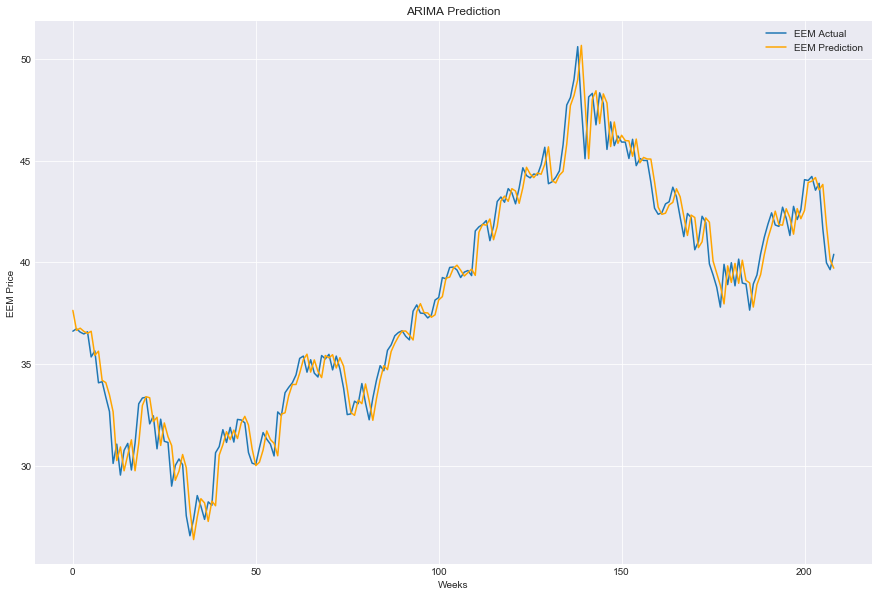

In [10]:
# plot
fig= plt.figure(figsize=(15,10))
plt.plot(test, label = 'EEM Actual')
plt.plot(predictions, color='orange', label = 'EEM Prediction')
plt.xlabel('Weeks')
plt.ylabel('EEM Price')
plt.title('ARIMA Prediction')
plt.legend()
plt.show()

In [11]:
ARIMA_pred_EEM = pd.DataFrame(predictions) 
ARIMA_pred_EEM.columns = ['ARIMA_pred_EEM']
%store ARIMA_pred_EEM

Stored 'ARIMA_pred_EEM' (DataFrame)
